In [2]:
#!/usr/bin/env python
import subprocess
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

In [3]:
'''
    Testing flood for UDP connections (proto=17)
'''
p = subprocess.run("rwfilter ./mysterious-dataset.rw --proto=17 --pass=stdout  --type=all | rwuniq --fields=sTime --sort-output --flows --no-columns --column-separator=' ' --no-title",
                    capture_output=True,
                    shell=True
                )

# --start-date=2014/11/24:16 --end-date=2014/11/24:17
# --start-date=2014/11/24:16 --end-date=2014/12/01:13
if p.stderr:
    raise p.stderr.decode()

out = p.stdout.decode()

/tmp/ipykernel_419/584693544.py:51: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  ax.locator_params(axis='x', nbins=10)


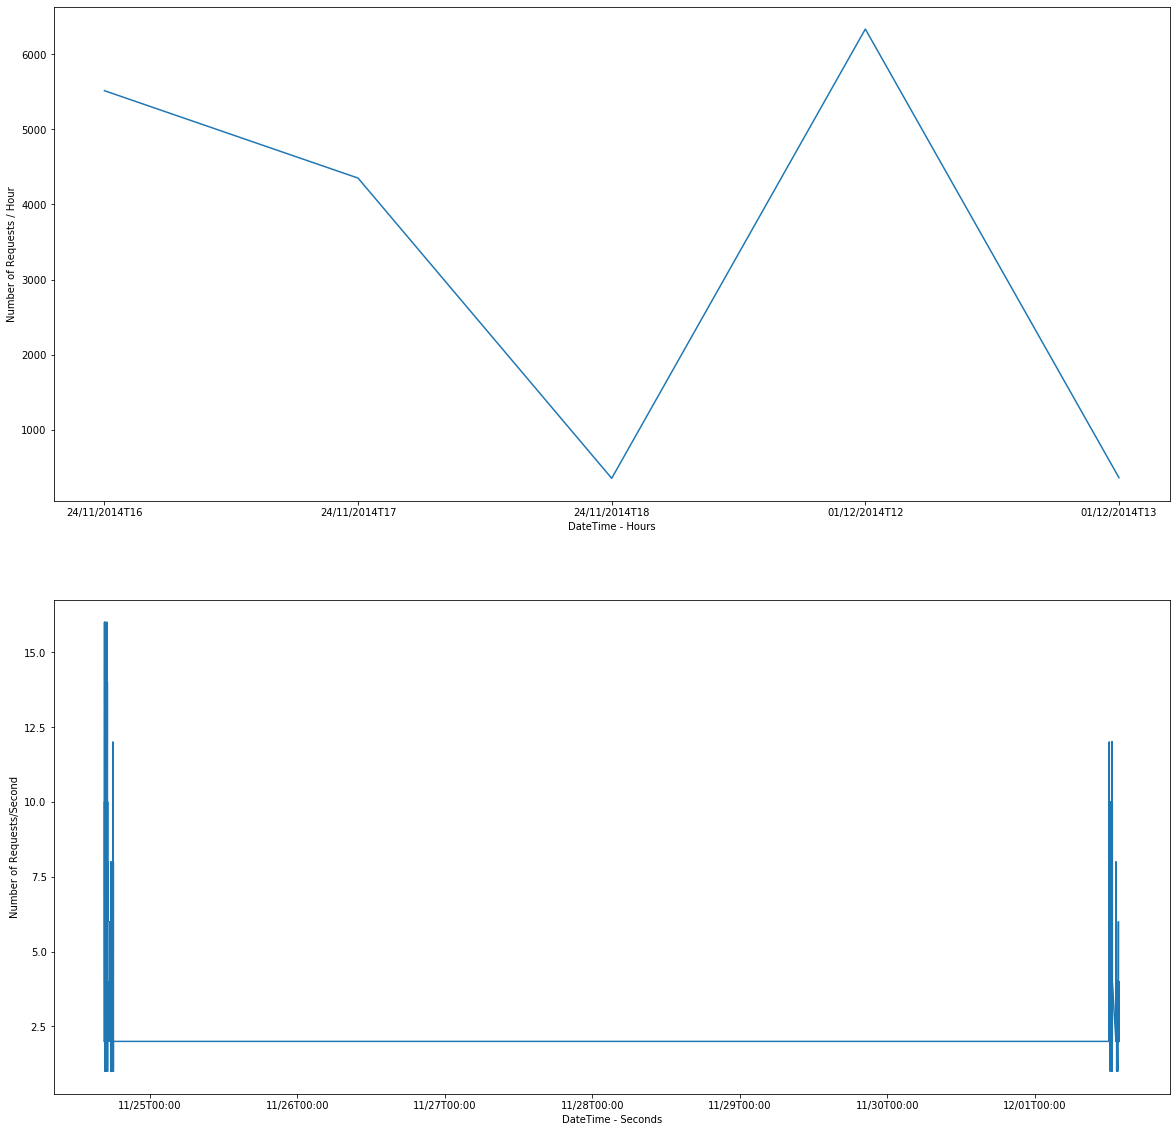

In [4]:
# key = x = dates
# values = y = count
dates_in_hours = dict()
dates_in_seconds = dict()
dates_in_seconds2 = dict()
t = out.splitlines()
for l in t:
    date_time,count = l.strip().split(' ')
    dt = datetime.strptime(date_time, '%Y/%m/%dT%H:%M:%S')
    
    ###  Add date counting ###
    
    ## seconds for details
    # More generalized /less filtered seconds
    dates_in_seconds2[dt] = int(count)
    
    ## hours to get an aproximate time
    date_str = dt.strftime('%d/%m/%YT%H')
    if dates_in_hours.get(date_str):
        dates_in_hours[date_str] += int(count)
    else:
        dates_in_hours[date_str] = int(count)


# hours

x = list(dates_in_hours.keys())
y = list(dates_in_hours.values())

fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(2,1,1)
ax.plot(x, y)

ax.set_xlabel("DateTime - Hours")
ax.set_ylabel("Number of Requests / Hour")

# seconds

lx = list(dates_in_seconds2.keys())
y = list(dates_in_seconds2.values())
x = pd.to_datetime(lx)


ax = fig.add_subplot(2,1,2)

ax.plot(x.to_pydatetime(), y)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%dT%H:%M'))

ax.locator_params(axis='x', nbins=10)
ax.locator_params(axis='y', nbins=7)
ax.set_xlabel("DateTime - Seconds")
ax.set_ylabel("Number of Requests/Second")

plt.show()

#out


Seeing the UDP connections graph, we can conclude that there was no UDP flood, as the graph is close to uniform on requests and doesn't have a bignumber or worrysome peaks of requests. All there is is a down time of requests in the middle of the recorded data with usual peaks at the beggining and end.